### Annotations

#### Adding text
#### Arrows and text

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())
os.chdir('/home/caizefeng/Programming/Matplotlib')

/home/caizefeng/jupyter_dir


##### Annotations with arrows in Matplotlib


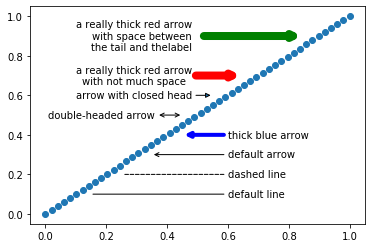

In [72]:
fig, ax = plt.subplots()
x = np.linspace(0,1)
ax.plot(x, x, 'o')

ax.annotate('default line', xy=(0.15,0.1), xytext=(0.6,0.1),
            arrowprops={'arrowstyle': '-'}, va='center')
ax.annotate('dashed line', xy=(0.25,0.2), xytext=(0.6,0.2),
            arrowprops={'arrowstyle': '-', 'ls': 'dashed'}, va='center')
ax.annotate('default arrow', xy=(0.35,0.3), xytext=(0.6,0.3),
            arrowprops={'arrowstyle': '->'}, va='center')
ax.annotate('thick blue arrow', xy=(0.45,0.4), xytext=(0.6,0.4),
            arrowprops={'arrowstyle': '->', 'lw': 4, 'color': 'blue'},
            va='center')
ax.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax.annotate('arrow with closed head', xy=(0.55,0.6), xytext=(0.1,0.6),
            arrowprops={'arrowstyle': '-|>'}, va='center')
ax.annotate('a really thick red arrow\nwith not much space', xy=(0.65,0.7),
            xytext=(0.1,0.7), va='center', multialignment='center',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r'})
ax.annotate('a really thick red arrow\nwith space between\nthe tail and the'
            'label', xy=(0.85,0.9), xytext=(0.1,0.9), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'g', 'shrinkA': 10})

plt.show()

##### The share price of BP plc (LSE: BP) with a couple of notable events


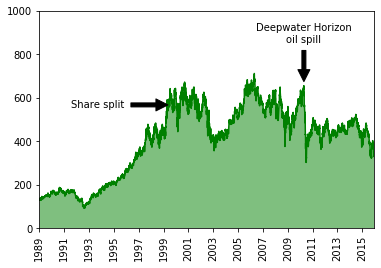

In [7]:
# import datetime
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.dates import strpdate2num
from datetime import datetime

def date_to_int(s):
    epoch = datetime(year=1970, month=1, day=1)
    date = datetime.strptime(s, '%Y-%m-%d')
    return (date - epoch).days

def bindate_to_int(bs):
    return date_to_int(bs.decode('ascii'))

dt_raw = np.dtype([('daynum','i8'), ('close', 'S8')])
share_price_raw = np.loadtxt('BP.L.csv', skiprows=1, delimiter=',',
                      usecols=(0,4), converters={0: bindate_to_int},
                      dtype=dt_raw)

# delete rows with 'null' as the close price first
null_index_list = []
for index, row in enumerate(share_price_raw):
    if row[1] == b'null':
        null_index_list.append(index)
share_price_stripped = np.delete(share_price_raw, null_index_list, axis=0)

dt = np.dtype([('daynum','i8'), ('close', 'f8')])
share_price = share_price_stripped.astype(dt)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(share_price['daynum'], share_price['close'], c='g')
ax.fill_between(share_price['daynum'], 0, share_price['close'], facecolor='g',
                alpha=0.5)

daymin, daymax = share_price['daynum'].min(), share_price['daynum'].max()
ax.set_xlim(daymin, daymax)
ax.set_ylim(0, 1000)
price_max = share_price['close'].max()

def get_xy(date):
    """ Return the (x,y) coordinates of the share price on a given date. """
    x = date_to_int(date)
    return share_price[np.where(share_price['daynum']==x)][0]

# A horizontal arrow and label
x,y = get_xy('1999-10-01')
ax.annotate('Share split', (x,y), xytext = (x-3000,y), va='center',
            arrowprops=dict(facecolor='black', shrink=0.1))
# A vertical arrow and label
x,y = get_xy('2010-04-20')
ax.annotate('Deepwater Horizon\noil spill', (x,y), xytext = (x,y+200),
            arrowprops=dict(facecolor='black', shrink=0.1), ha='center')

years = range(1989,2016,2)
ax.set_xticks([date_to_int('{:4d}-01-01'.format(year)) for year in years])
ax.set_xticklabels(years, rotation=90)

plt.show()

#### Lines and span rectangles
##### Some different ways to use ax.vlines and ax.hlines

In [ ]:
fig, ax = plt.subplots()
ax.axis('equal')

# A circle made of horizontal lines
y = np.linspace(-1,1,100)
xmax = np.sqrt(1 - y**2)
ax.hlines(y, -xmax, xmax, lw=0.5, color='g')

# Draw a box of thicker lines around the circle
ax.vlines(-1, -1, 1, lw=2, color='r')
ax.vlines(1, -1, 1, lw=2, color='r')
ax.hlines(-1, -1, 1, lw=2, color='r')
ax.hlines(1, -1, 1, lw=2, color='r')
# Some evenly-spaced vertical lines
ax.vlines(y[10::10], -1, 1, color='b')

# Remove tick marks and labels
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# A bit of padding around the outside of the box
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)

# A thick, blue, dashed vertical line at x = 0.5. around the center of the y-axis
ax.axvline(0.5, 0.4, 0.6, c='b', lw=4, ls='--')

plt.show()

##### A representation of the electromagnetic spectrum, 250–1,000 nm


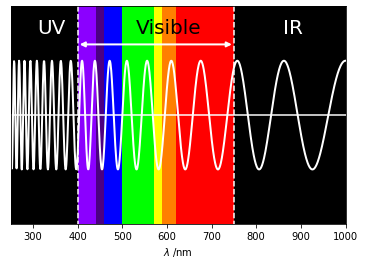

In [8]:
import matplotlib.axes._axes as axes
import matplotlib.figure as figure

# wavelength range, nm
lmin, lmax = 250, 1000
x = np.linspace(lmin, lmax, 1000)
# A wave with a smoothly increasing wavelength
wv = (np.sin(10 * np.pi * x / (lmax+lmin-x)))[::-1]

fig = plt.figure() # type:figure.Figure
ax = fig.add_subplot(111, facecolor='k') # type:axes.Axes
ax.plot(x, wv, c='w', lw=2)
ax.set_xlim(250,1000)
ax.set_ylim(-2,2)

# Label and delimit the different regions of the electromagnetic spectrum
ax.text(310, 1.5, 'UV', color='w', fontdict={'fontsize': 20})
ax.text(530, 1.5, 'Visible', color='k', fontdict={'fontsize': 20})
ax.annotate('', (400, 1.3), (750, 1.3), arrowprops={'arrowstyle': '<|-|>',
                                                    'color': 'w', 'lw': 2})
ax.text(860, 1.5, 'IR', color='w', fontdict={'fontsize': 20})
ax.axvline(400, -2, 2, c='w', ls='--')
ax.axvline(750, -2, 2, c='w', ls='--')
# Horizontal "axis" across the centre of the wave
ax.axhline(c='w')
# Ditch the y-axis ticks and labels; label the x-axis
ax.yaxis.set_visible(False)
ax.set_xlabel(r'$\lambda\;/\mathrm{nm}$')

# Finally, add some colourful rectangles representing a rainbow in the
# visible region of the spectrum.
# Dictionary mapping of wavelength regions (nm) to approximate RGB values
rainbow_rgb = { (400, 440): '#8b00ff', (440, 460): '#4b0082',
                (460, 500): '#0000ff', (500, 570): '#00ff00',
                (570, 590): '#ffff00', (590, 620): '#ff7f00',
                (620, 750): '#ff0000'}
for wv_range, rgb in rainbow_rgb.items():
    ax.axvspan(*wv_range, color=rgb, ec='none', alpha=1)
plt.show()


### Circles, ellipses, rectangles and other patches
#### Circles and Ellipses


##### An analysis of the height-mass relationship in 507 healthy individuals

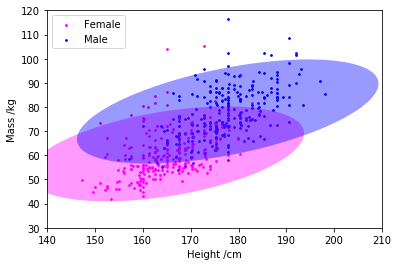

In [14]:
from matplotlib.patches import Ellipse

FEMALE, MALE = 0, 1
dt = np.dtype([('mass', 'f8'), ('height', 'f8'), ('gender', 'i2')])
data = np.loadtxt('body.dat.txt', usecols=(22,23,24), dtype=dt)

fig, ax = plt.subplots()

def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)
    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=float(np.degrees(theta)), **kwargs)

labels, colours =['Female', 'Male'], ['magenta', 'blue']
for gender in (FEMALE, MALE):
    sdata = data[data['gender']==gender]
    height_mean = np.mean(sdata['height'])
    mass_mean = np.mean(sdata['mass'])
    cov = np.cov(sdata['mass'], sdata['height'])
    ax.scatter(sdata['height'], sdata['mass'], color=colours[gender],
               label=labels[gender], s=3)
    e = get_cov_ellipse(cov, (height_mean, mass_mean), 3,
                        fc=colours[gender], alpha=0.4)
    ax.add_artist(e)

ax.set_xlim(140, 210)
ax.set_ylim(30, 120)
ax.set_xlabel('Height /cm')
ax.set_ylabel('Mass /kg')
ax.legend(loc='upper left', scatterpoints=1)
plt.show()

#### Rectangles
#### Polygons
##### Some colorful shapes

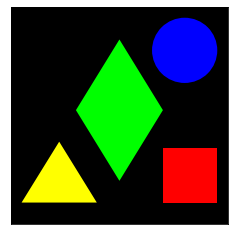

In [15]:
from matplotlib.patches import Polygon, Circle, Rectangle

red, blue, yellow, green = '#ff0000', '#0000ff', '#ffff00', '#00ff00'
square = Rectangle((0.7, 0.1), 0.25, 0.25, facecolor=red)
circle = Circle((0.8, 0.8), 0.15, facecolor=blue)
triangle = Polygon(((0.05,0.1), (0.396,0.1), (0.223, 0.38)), fc=yellow)
rhombus = Polygon(((0.5,0.2), (0.7,0.525), (0.5,0.85), (0.3,0.525)),  fc=green)

fig = plt.figure()
ax = fig.add_subplot(111, facecolor='k', aspect='equal')
for shape in (square, circle, triangle, rhombus):
    ax.add_artist(shape)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

## Contour plots, heatmaps and 3D plots
### Contour plots

#### The electrostatic potential of a point dipole

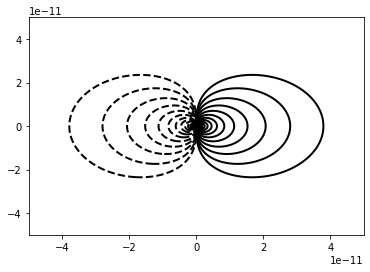

In [22]:
# Dipole charge (C), Permittivity of free space (F.m-1)
q, eps0 = 1.602e-19, 8.854e-12
# Dipole +q, -q distance (m) and a convenient combination of parameters
d = 1.e-12
# np.pi is a float
k = 1/4/np.pi/eps0 * q * d


# Cartesian axis system with origin at the dipole (m)
X = np.linspace(-5e-11, 5e-11, 1000)
Y = X.copy()
X, Y = np.meshgrid(X, Y)

# Dipole electrostatic potential (V), using point dipole approximation
Phi = k * X / np.hypot(X, Y)**3

fig = plt.figure()
ax = fig.add_subplot(111)
# Draw contours at values of Phi given by levels
levels = np.array([10**pw for pw in np.linspace(0,5,20)])
# Contour levels must be increasing
levels = sorted(list(-levels) + list(levels))
# Monochrome plot of potential
ax.contour(X, Y, Phi, levels=levels, colors='k', linewidths=2)
plt.show()

##### An example of filled and styled contours

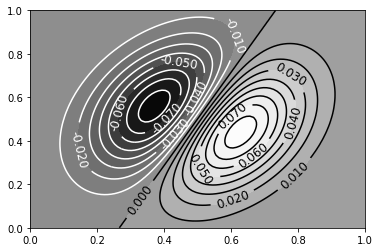

In [29]:
import matplotlib.cm as cm

X = np.linspace(0,1,100)
Y = X.copy()
X, Y = np.meshgrid(X, Y)
alpha = np.radians(25)
cX, cY = 0.5, 0.5
sigX, sigY = 0.2, 0.3
rX = np.cos(alpha) * (X-cX) - np.sin(alpha) * (Y-cY) + cX
rY = np.sin(alpha) * (X-cX) + np.cos(alpha) * (Y-cY) + cY

Z = (rX-cX)*np.exp(-((rX-cX)/sigX)**2) * np.exp(- ((rY-cY)/sigY)**2)
fig = plt.figure()
ax = fig.add_subplot(111)

# Reversed Greys colourmap for filled contours
cpf = ax.contourf(X,Y,Z, 20, cmap=cm.Greys_r)
# Set the colours of the contours and labels so they're white where the
# contour fill is dark (Z < 0) and black where it's light (Z >= 0)
colours = ['w' if level<0 else 'k' for level in cpf.levels]
cp = ax.contour(X, Y, Z, 20, colors=colours)
ax.clabel(cp, fontsize=12, colors=colours)
plt.show()

### Heatmaps
#### *ax.imshow*
#### *ax.pcolor* and *ax.pcolormesh*

##### A comparison of interpolation schemes for a small array visualized with imshow()

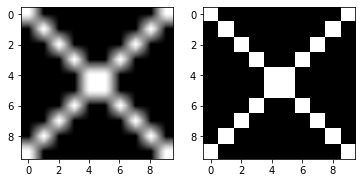

In [36]:
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'
a = np.eye(10,10)
a += a[::-1,:]

fig = plt.figure()
ax1 = fig.add_subplot(121) # type: axes.Axes
# Bilinear interpolation - this will look blurry
ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122) # type: axes.Axes
# 'nearest' interpolation - faithful but blocky
ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

##### Barnsley’s fern

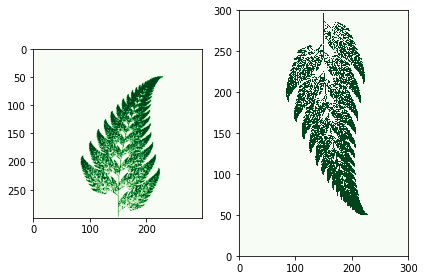

In [48]:
f1 = lambda x,y: (0., 0.16*y)
f2 = lambda x,y: (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)
f3 = lambda x,y: (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)
f4 = lambda x,y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)
fs = [f1, f2, f3, f4]

npts = 50000
# Canvas size (pixels)
width, height = 300, 300
aimg = np.zeros((width, height))

x, y = 0, 0
for i in range(npts):
    # Pick a random transformation and apply it
    f = np.random.choice(fs, p=[0.01, 0.85, 0.07, 0.07])
    x, y = f(x,y)
    # Map (x,y) to pixel coordinates.
    # NB we "know" that -2.2 < x < 2.7 and 0 <= y < 10

    ix, iy = int(width / 2 + x * width / 10), int(y * height / 12)
    # Set this point of the array to 1 to mark a point in the fern
    aimg[iy, ix] = 1

# plt.imshow(aimg[::-1,:], cmap=cm.Greens)
fig, axes = plt.subplots(1,2)
axes[0].imshow(aimg[::-1,:],interpolation="bilinear", cmap=cm.Greens)
axes[1].pcolormesh(aimg[::-1,:], cmap=cm.Greens)
fig.tight_layout()
plt.show()

#### Color bars

##### Heatmap of Boston’s temperatures in 2012

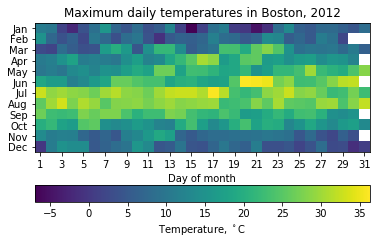

In [51]:
# Read in the relevant data from our input file
dt = np.dtype([('month', np.int), ('day', np.int), ('T', np.float)])
# An integer or sequence of integers can also be provided as width(s) of each field.
data = np.genfromtxt('boston2012.dat', dtype=dt, usecols=(1,2,3),
                     delimiter=(4,2,2,6))

# In our heatmap, nan will mean "no such date", e.g. 31 June
heatmap = np.empty((12, 31))
heatmap[:] = np.nan

for month, day, T in data:
    # NumPy arrays are zero-indexed; days and months are not!
    heatmap[month-1, day-1] = T

# Plot the heatmap, customize and label the ticks
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')
ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
days = np.array(range(0, 31, 2))
ax.set_xticks(days)
ax.set_xticklabels(['{:d}'.format(day+1) for day in days])
ax.set_xlabel('Day of month')
ax.set_title('Maximum daily temperatures in Boston, 2012')

# Add a colour bar along the bottom and label it
cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Temperature, $^\circ\mathrm{C}$')

plt.show()

##### The two-dimensional diffusion equation applied to the temperature of a steel plate

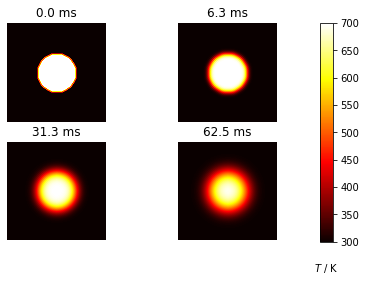

In [67]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        # print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
# The dimensions [left, bottom, width, height] of the new axes,  All quantities are in fractions of figure width and height
cbar_ax = fig.add_axes([0.9, 0.12, 0.03, 0.76]) # type: axes.Axes
# labelpad – Spacing in points from the axes bounding box including ticks and tick labels.
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()
